<a href="https://colab.research.google.com/github/marcosjsh/fiap_tech_challenge/blob/main/Previsa%CC%83o_Seguro_Sau%CC%81de_Completo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tech Challenge Fase 1 - Grupo 26**
* André Philipe Oliveira de Andrade(RM357002) - andrepoandrade@gmail.com
* Joir Neto (RM356391) - joirneto@gmail.com
* Marcos Jen San Hsie(RM357422) - marcosjsh@gmail.com
* Michael dos Santos Silva(RM357009) - michael.shel96@gmail.com
* Sonival dos Santos(RM356905) - sonival.santos@gmail.com

# O Problema


Você é um profissional encarregado de desenvolver um modelo preditivo de regressão para prever o valor dos custos médicos individuais cobrados pelo seguro de saúde.

Origem dos dados: Arquivo 'insurance.csv' obtido através do github do curso(https://github.com/FIAP/CURSO_IA_ML). Obs: Os termos utilizados no arquivo foram traduzidos do inglês para o português.

## 1. Importando e Analisando os dados

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(style='darkgrid')
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

df = pd.read_csv("/content/drive/MyDrive/colab-data/seguro-saude.csv")
df.shape


(1341, 7)

In [11]:
df.head()

,idade,gênero,imc,filhos,fumante,região,encargos
0,56,feminino,29.774374,2,sim,sudoeste,31109.889763
1,46,masculino,25.857395,1,não,nordeste,26650.702647
2,32,masculino,23.014840,0,não,sudoeste,21459.037990
3,19,feminino,27.900000,0,sim,sudoeste,16884.924000
4,18,masculino,33.770000,1,não,sudeste,1725.552300


In [12]:
df.describe()

,idade,imc,filhos,encargos
count,1341.000000,1341.000000,1341.000000,1341.000000
mean,39.219239,30.653446,1.094705,13299.809561
std,14.044321,6.096393,1.204770,12113.807202
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.220000,0.000000,4746.344000
50%,39.000000,30.360000,1.000000,9391.346000
75%,51.000000,34.675000,2.000000,16796.411940
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   idade     1341 non-null   int64  
 1   gênero    1341 non-null   object 
 2   imc       1341 non-null   float64
 3   filhos    1341 non-null   int64  
 4   fumante   1341 non-null   object 
 5   região    1341 non-null   object 
 6   encargos  1341 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.5+ KB


In [13]:
df.isnull().sum()

idade       0
gênero      0
imc         0
filhos      0
fumante     0
região      0
encargos    0
dtype: int64

Podemos observar que não há dados nulos e que as colunas com valores categóricos são: gênero, fumante e região.

Valores numéricos estão nas colunas: idade, imc, filhos e encargos.

## 2. Representação gráfica dos dados

### 2.1 - Por Região

In [ ]:
regioes = set(df["região"])
print(regioes)

{'nordeste', 'sudoeste', 'noroeste', 'sudeste'}


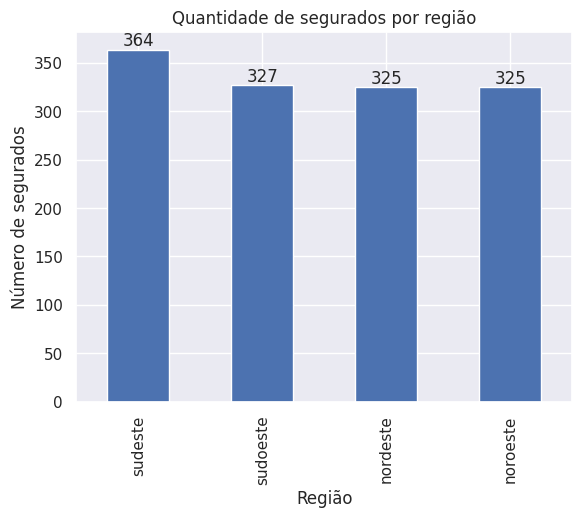

In [14]:
qtd_regiao = df["região"].value_counts()
ax = qtd_regiao.plot(kind='bar')

plt.title('Quantidade de segurados por região')
plt.xlabel('Região')
plt.ylabel('Número de segurados')

for i, count in enumerate(qtd_regiao):
    ax.annotate(str(count), xy=(i, count), ha='center', va='bottom')

plt.show()

Acima, podemos analisar que a coluna "região" possui quatro categorias e que, apesar da região Sudeste possuir uma quantidade ligeiramente maior de pessoas, não consideraremos isso como um desequilíbrio.

### 2.2 - Por Gênero

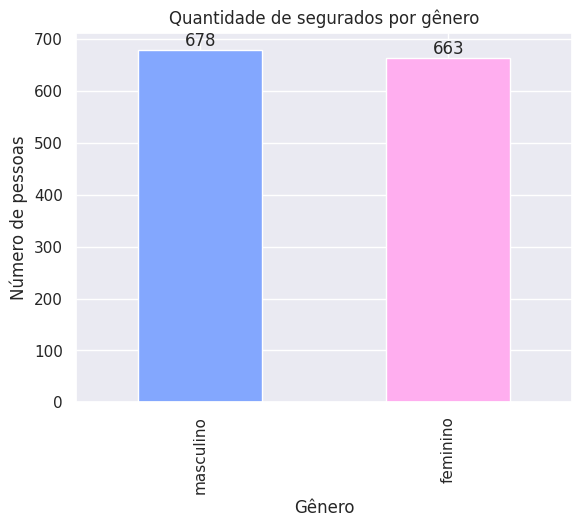

In [15]:
qtd_genero = df["gênero"].value_counts()
custom_colors = ['#83a7fe', '#ffaeef']
ax = qtd_genero.plot(kind='bar', color=custom_colors[:len(qtd_genero)])

plt.title('Quantidade de segurados por gênero')
plt.xlabel('Gênero')
plt.ylabel('Número de pessoas')

for i, count in enumerate(qtd_genero):
    ax.annotate(str(count), xy=(i, count), ha='center', va='bottom')

plt.show()

Acima, percebemos que os valores estão bem distribuídos na coluna "gênero" e que ela pode ser facilmente convertida para valores binários em vez de texto.

### 2.3 - Por Fumante/Não Fumante

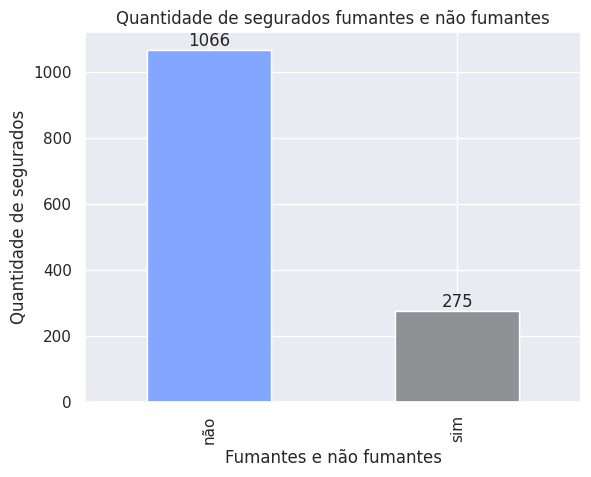

In [16]:
qtd_fumante = df["fumante"].value_counts()
custom_colors = ['#83a7fe', '#909195']
qtd_fumante.plot(kind='bar')
ax = qtd_fumante.plot(kind='bar', color=custom_colors[:len(qtd_fumante)])

plt.title('Quantidade de segurados fumantes e não fumantes')
plt.xlabel('Fumantes e não fumantes')
plt.ylabel('Quantidade de segurados')

for i, count in enumerate(qtd_fumante):
    ax.annotate(str(count), xy=(i, count), ha='center', va='bottom')

plt.show()

A coluna "fumante" também pode ser convertida em binário. No entanto, observa-se que os valores não estão bem distribuídos, pois existem muitos mais não fumantes do que fumantes.

### 2.4 - Analisando os dados numéricos

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'imc'}>],
       [<Axes: title={'center': 'filhos'}>,
        <Axes: title={'center': 'encargos'}>]], dtype=object)

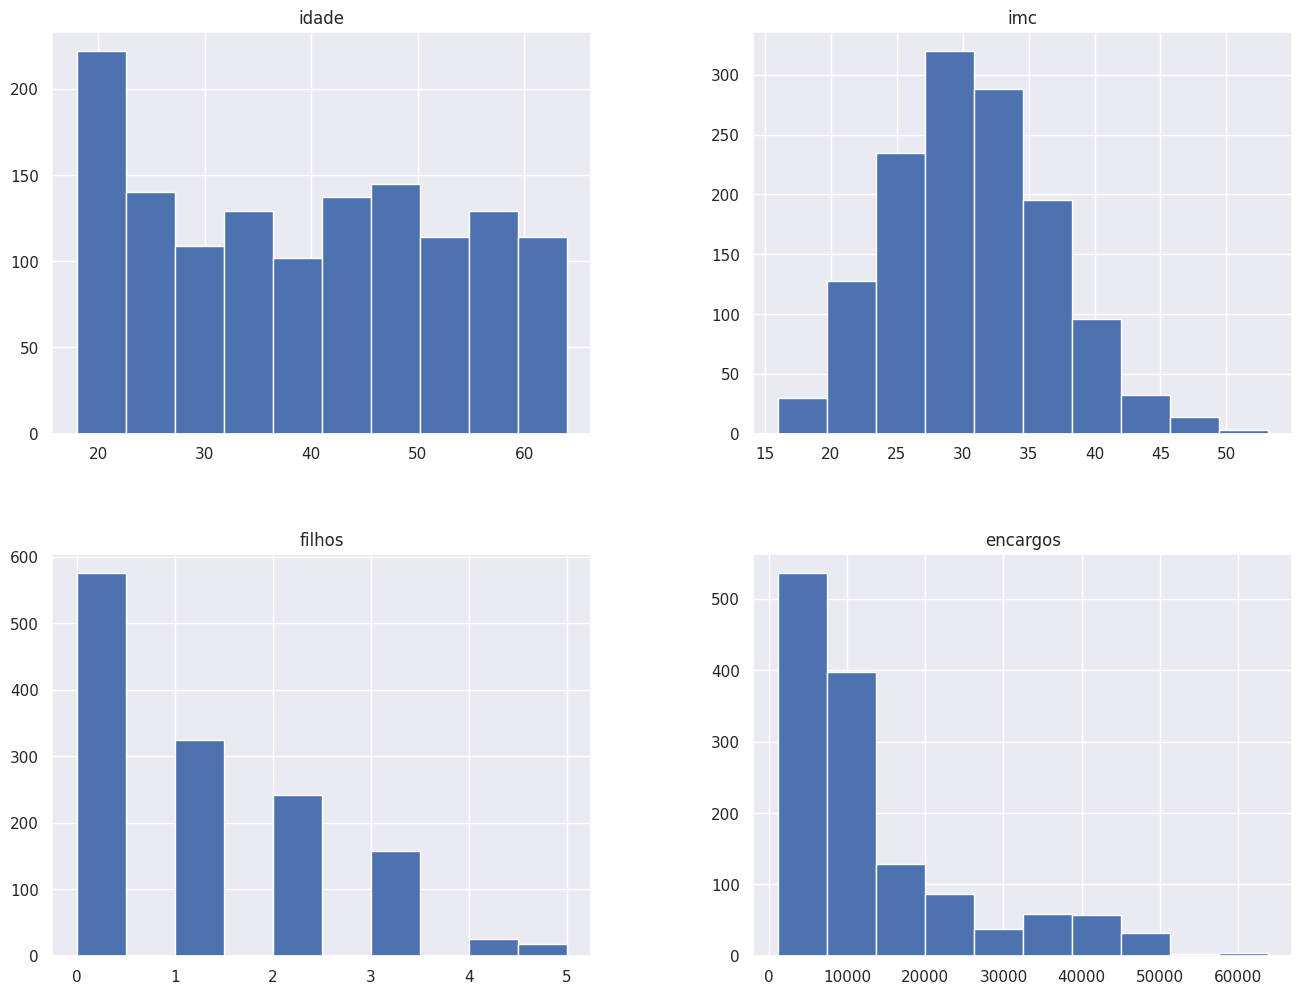

In [22]:
df.hist(figsize=(16, 12))

## 3. Verificação de outliers

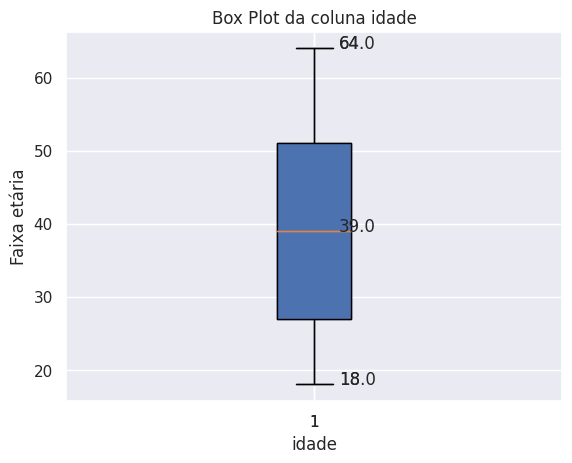

In [23]:
plt.boxplot(df['idade'])
plt.xlabel('idade')
plt.ylabel('Faixa etária')
plt.title(f'Box Plot da coluna idade')

boxplot = plt.boxplot(df['idade'], patch_artist=True)
outliers = boxplot['fliers'][0].get_ydata()
whiskers = [item.get_ydata()[1] for item in boxplot['whiskers']]
medians = [item.get_ydata()[0] for item in boxplot['medians']]
caps = [item.get_ydata()[1] for item in boxplot['caps']]

for outlier in outliers:
    plt.annotate(f'{outlier}', xy=(1, outlier), xytext=(1.05, outlier))

for whisker in whiskers:
    plt.annotate(f'{whisker}', xy=(1, whisker), xytext=(1.05, whisker))

for median in medians:
    plt.annotate(f'{median}', xy=(1, median), xytext=(1.05, median))

for cap in caps:
    plt.annotate(f'{cap}', xy=(1, cap), xytext=(1.05, cap))

plt.show()

O box plot da coluna "idade" nos mostra uma mediana de 39 anos, um intervalo interquartil de aproximadamente 30 a 50 anos, um valor mínimo de 18 anos e um valor máximo de 64 anos para os segurados. Não foram encontrados outliers neste gráfico.

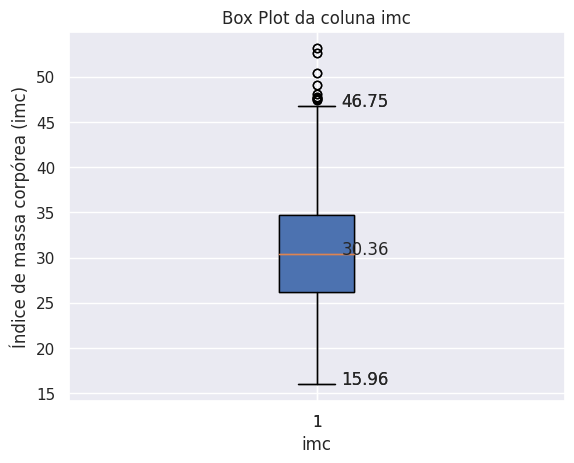

In [24]:
plt.boxplot(df['imc'])
plt.xlabel('imc')
plt.ylabel('Índice de massa corpórea (imc)')
plt.title(f'Box Plot da coluna imc')

boxplot = plt.boxplot(df['imc'], patch_artist=True)
outliers = boxplot['fliers'][0].get_ydata()
whiskers = [item.get_ydata()[1] for item in boxplot['whiskers']]
medians = [item.get_ydata()[0] for item in boxplot['medians']]
caps = [item.get_ydata()[1] for item in boxplot['caps']]

# for outlier in outliers:
#     plt.annotate(f'{outlier:.2f}', xy=(1, outlier), xytext=(1.05, outlier))

for whisker in whiskers:
    plt.annotate(f'{whisker:.2f}', xy=(1, whisker), xytext=(1.05, whisker))

for median in medians:
    plt.annotate(f'{median:.2f}', xy=(1, median), xytext=(1.05, median))

for cap in caps:
    plt.annotate(f'{cap:.2f}', xy=(1, cap), xytext=(1.05, cap))

plt.show()

Este gráfico da coluna "imc" nos mostra uma mediana de 30.36, um intervalo interquartil de aproximadamente 25 a 35, um valor mínimo de 15.96, um valor máximo de 46.75, e vários outliers acima do valor máximo.

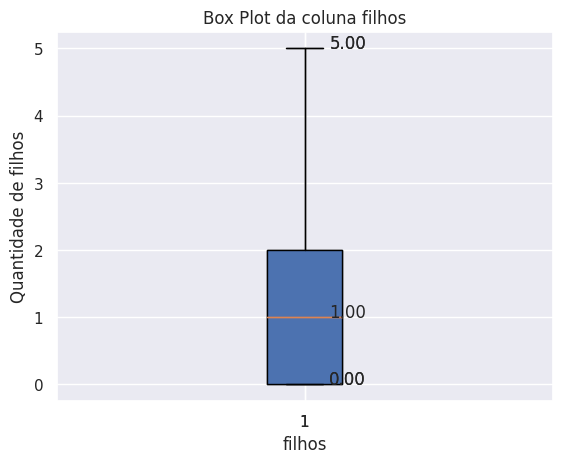

In [25]:
plt.boxplot(df['filhos'])
plt.xlabel('filhos')
plt.ylabel('Quantidade de filhos')
plt.title(f'Box Plot da coluna filhos')

boxplot = plt.boxplot(df['filhos'], patch_artist=True)
outliers = boxplot['fliers'][0].get_ydata()
whiskers = [item.get_ydata()[1] for item in boxplot['whiskers']]
medians = [item.get_ydata()[0] for item in boxplot['medians']]
caps = [item.get_ydata()[1] for item in boxplot['caps']]

for outlier in outliers:
    plt.annotate(f'{outlier:.2f}', xy=(1, outlier), xytext=(1.05, outlier))

for whisker in whiskers:
    plt.annotate(f'{whisker:.2f}', xy=(1, whisker), xytext=(1.05, whisker))

for median in medians:
    plt.annotate(f'{median:.2f}', xy=(1, median), xytext=(1.05, median))

for cap in caps:
    plt.annotate(f'{cap:.2f}', xy=(1, cap), xytext=(1.05, cap))

plt.show()

O box plot da coluna "filhos" temos uma mediana de 1, um intervalo interquartil de 0 a 2, um valor mínimo de 0 e um valor máximo de 5 filhos, sem outliers.

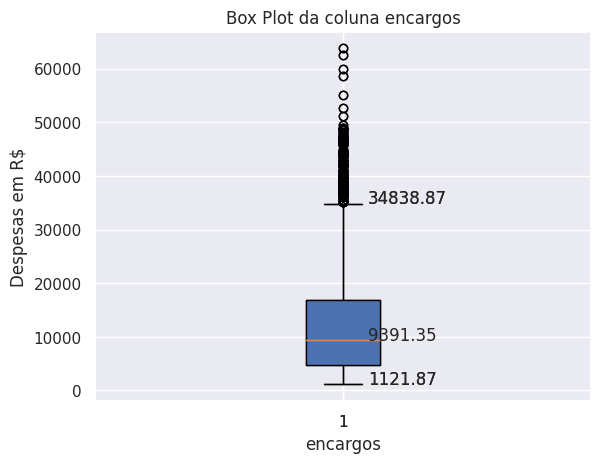

In [26]:
plt.boxplot(df['encargos'])
plt.xlabel('encargos')
plt.ylabel('Despesas em R$')
plt.title(f'Box Plot da coluna encargos')

boxplot = plt.boxplot(df['encargos'], patch_artist=True)
outliers = boxplot['fliers'][0].get_ydata()
whiskers = [item.get_ydata()[1] for item in boxplot['whiskers']]
medians = [item.get_ydata()[0] for item in boxplot['medians']]
caps = [item.get_ydata()[1] for item in boxplot['caps']]

# for outlier in outliers:
#     plt.annotate(f'{outlier:.2f}', xy=(1, outlier), xytext=(1.05, outlier))

for whisker in whiskers:
    plt.annotate(f'{whisker:.2f}', xy=(1, whisker), xytext=(1.05, whisker))

for median in medians:
    plt.annotate(f'{median:.2f}', xy=(1, median), xytext=(1.05, median))

for cap in caps:
    plt.annotate(f'{cap:.2f}', xy=(1, cap), xytext=(1.05, cap))

plt.show()

No box plot de "encargos" temos uma mediana de 9391.35, um intervalo interquartil de aproximadamente 1121.87 a 18000, um valor mínimo de 1121.87 e um valor máximo de 34838.87 em encargos, e vários outliers acima do valor máximo.

## 4. Análise da correlação dos dados

### 4.1 - Região X Encargos totais

In [27]:
encargos_por_regiao = df.groupby('região')['encargos'].sum().reset_index()
quantidade_por_regiao = df['região'].value_counts().reset_index()
quantidade_por_regiao.columns = ['região', 'quantidade']

merged_df = pd.merge(encargos_por_regiao, quantidade_por_regiao, on='região')

fig = px.bar(merged_df, x='região', y=['encargos'],
             title='Quantidade de Pessoas e Encargos Totais por Região',
             text='quantidade',
             labels={'value': 'Encargos', 'variable': 'Métrica', 'região': 'Região', 'quantidade': 'Qtd'})

fig.update_traces(textposition='outside')

fig.show()

Acima, podemos observar que o valor total dos encargos por região faz sentido. A região Sudeste possui mais pessoas do que as demais, e a região Nordeste, apesar de ter a mesma quantidade de pessoas que as outras regiões, possui um valor total de encargos ligeiramente mais alto. Consideramos isso normal, pois há outros fatores que podem elevar o custo final do seguro saúde.

### 4.2 - Total de Encargos por Região e Fumante/Não Fumante

In [28]:
grouped_df = df.groupby(['região', 'fumante']).agg({'encargos': 'sum'}).reset_index()
grouped_df['contagem'] = df.groupby(['região', 'fumante']).size().values
custom_colors = ['#83a7fe', '#909195']

fig = px.bar(grouped_df, x="região", y="encargos",
             color='fumante', barmode='group',text='contagem', title='Total de Encargos por Região e Fumante/Não Fumante',
             labels={'encargos': 'Encargos', 'fumante': 'Fumante', 'região': 'Região', 'contagem': 'Qtd'},
             color_discrete_sequence=custom_colors)

fig.update_traces(textposition='outside')
fig.show()

Aqui, fica claro que o fato de ser fumante influencia muito no valor final do seguro saúde. Observe que na região Sudeste temos 273 não fumantes, totalizando pouco mais de 2 milhões, enquanto apenas 91 fumantes totalizam mais de 3 milhões.

### 4.3 - Total de Encargos por Região, Gênero e Fumante/Não Fumante

Ao analisar o total de encargos por gênero, decidimos separar por fumantes e não fumantes, uma vez que vimos que essa característica afeta significativamente o preço final.

In [29]:
grouped_df = df.groupby(['região', 'gênero', 'fumante']).agg({'encargos': 'sum'}).reset_index()
grouped_df['contagem'] = df.groupby(['região', 'gênero', 'fumante']).size().values
custom_colors = ['#ffaeef', '#83a7fe']

fig = px.bar(grouped_df, x='região', y='encargos', color='gênero', barmode='group',
             facet_col='fumante', text='contagem', title='Total de Encargos por Região, Gênero e Fumante/Não Fumante',
             labels={'encargos': 'Encargos', 'fumante': 'Fumante', 'região': 'Região', 'contagem': 'Qtd', 'gênero': 'Gênero'},
             color_discrete_sequence=custom_colors)

fig.update_traces(textposition='outside')
fig.show()

Podemos observar que apenas o gênero em si não afeta o preço e que as diferenças apresentadas são meramente fruto do quantitativo.

### 4.4 - Total de Encargos por Região, Fumante e Quantidade de Filhos

O gráfico box plot por quantidade de filhos já nos revelou que, em relação à quantidade de filhos, os dados estão concentrados na faixa de 0 a 2 filhos. Portanto, um gráfico de quantidade de filhos por região não faz muito sentido, já que o quantitativo seria o maior responsável pela discrepância dos valores.

Vamos agora visualizar dois gráficos de barras empilhadas que se correlacionam, divididos por fumantes e não fumantes.

In [ ]:
encargos_agrupados = df.groupby(['região', 'fumante', 'filhos'])['encargos'].sum().reset_index()
quantidade_agrupada = df.groupby(['região', 'fumante', 'filhos']).size().reset_index(name='quantidade')

fig_encargos = px.bar(encargos_agrupados, x='região', y='encargos', color='filhos', facet_col='fumante',
             title='Total de Encargos por Região, Fumante e Quantidade de Filhos',
             labels={'encargos': 'Encargos', 'região': 'Região', 'filhos': 'Filhos', 'fumante': 'Fumante'})
fig_quantidade = px.bar(quantidade_agrupada, x='região', y='quantidade', color='filhos', facet_col='fumante',
             title='Quantidade de Pessoas por Região, Fumante e Quantidade de Filhos',
             labels={'quantidade': 'Qtd', 'região': 'Região', 'filhos': 'Filhos', 'fumante': 'Fumante'})


fig_encargos.update_traces(texttemplate='%{y}', textposition='outside')
fig_quantidade.update_traces(texttemplate='%{y}', textposition='outside')

fig_encargos.show()
fig_quantidade.show()

Entre os não fumantes, a região nordeste possui o maior valor total de encargos com aproximadamente 2.38 milhões. Enquanto que as demais regiões variam em termos de valores, sendo o sudeste a região com o menor total. Famílias com 1 ou 2 filhos aparentemente tem uma proporção significativa dos encargos.

Entre os fumantes, a região sudeste tem o maior valor de encargos com aproximadamente 3.17 milhões. A região sudoeste tem o menor valor total. Famílias com 2 filhos na região sudeste possuem encargos mais elevados.

Fazer as mesmas análises acima utilizando o IMC ou idade não faz muito sentido, pois o agrupamento não funcionaria bem, uma vez que os valores dessas colunas são muito distintos.

### 4.5 - Transformando os valores categóricos em numéricos

Para visualizarmos a matriz de correlação, precisamos transformar os valores categóricos em valores numéricos. Para isso, vamos utilizar o LabelEncoder, que basicamente irá criar um rótulo numérico relacionado com cada valor de texto em cada coluna.

In [30]:
df_num = df.copy(deep=True)
label_encoder = LabelEncoder()
df_num['gênero'] = label_encoder.fit_transform(df['gênero'])
df_num['fumante'] = label_encoder.fit_transform(df['fumante'])
df_num['região'] = label_encoder.fit_transform(df['região'])
df_num.head()

,idade,gênero,imc,filhos,fumante,região,encargos
0,56,0,29.774374,2,1,3,31109.889763
1,46,1,25.857395,1,0,0,26650.702647
2,32,1,23.014840,0,0,3,21459.037990
3,19,0,27.900000,0,1,3,16884.924000
4,18,1,33.770000,1,0,2,1725.552300


In [42]:
fig = px.scatter(df_num, x='idade', y='encargos', color='fumante', symbol='gênero', size='imc',
                 facet_col='região', title='Dispersão dos Encargos por Idade, Fumante, Gênero e Região (mulheres representadas por círculos)',
                 labels={'idade': 'Idade', 'encargos': 'Encargos', 'fumante': 'Fumante', 'gênero': 'Gênero', 'imc': 'IMC', 'região': 'Região'})

fig.show()

No gráfico de dispersão acima, podemos ver que a idade e o fato de ser fumante são fortes indicadores de aumento dos encargos totais. No entanto, também podemos observar que o IMC aumenta significativamente os encargos. Note nos gráficos das regiões 0 e 2, onde há um losango localizado bem acima da linha de 10k e ligeiramente atrás dos 40 anos de idade.
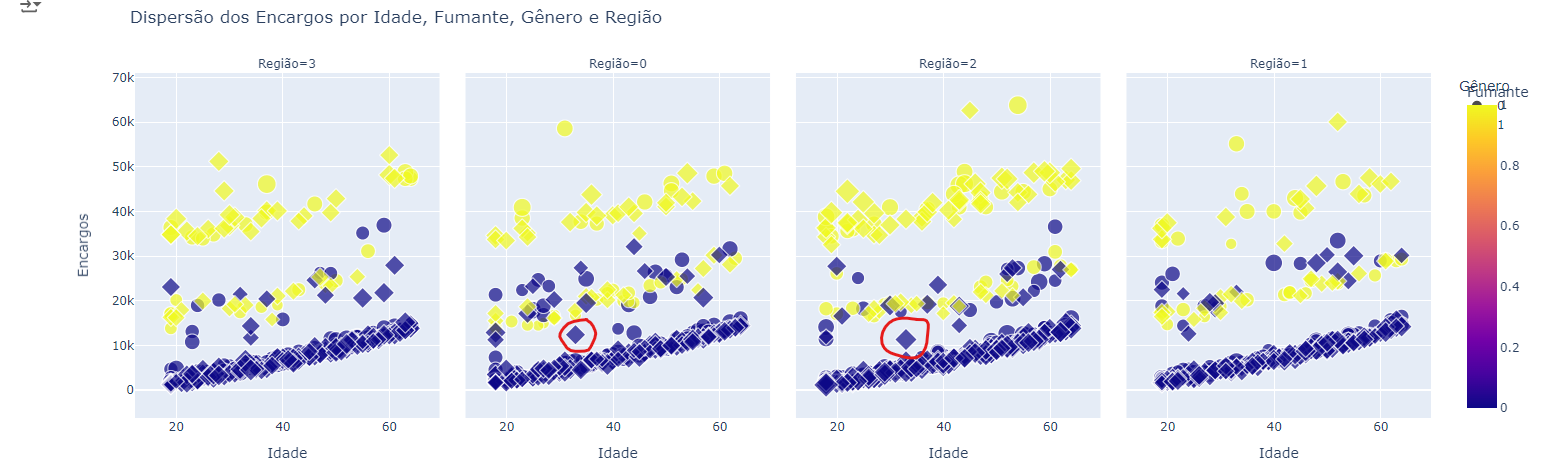


Perceba que os dois casos citados acima são de idade mediana, 33 anos, e não fumantes, mas o IMC alto os distinguiu dos demais com características semelhantes, posicionando-os em uma faixa de preço acima dos 10k.

Agora, vamos utilizar o mesmo gráfico acima, mas desta vez separaremos por quantidade de filhos em vez de região.

In [41]:
fig = px.scatter(df_num, x='idade', y='encargos', color='fumante', symbol='gênero', size='imc',
                 facet_col='filhos', title='Dispersão dos Encargos por Idade, Fumante, Gênero e Quantidade de filhos (mulheres representadas por círculos)',
                 labels={'idade': 'Idade', 'encargos': 'Encargos', 'fumante': 'Fumante', 'gênero': 'Gênero', 'imc': 'IMC', 'filhos': 'Filhos'})

fig.show()

No gráfico acima, passa a ficar claro que fatores com tabagismo, idade e excesso de peso influenciam muito no aumento de custos de um segurado. Podemos verificar também através do gráfico que a quantidade de filhos passa a exercer influencia nos custos à partir de 4 filhos ou mais, talvez pela amostragem contida na base de dados. O fator sexo não parece ter uma forte correlação com os encargos.

In [43]:
fig = px.scatter(
    df_num,
    x='encargos',
    y='idade',
    size='imc',
    color='fumante',
    size_max=20,
    title='Custos x Idade x Fumantes x IMC',
    labels={'idade': 'Idade', 'encargos': 'Encargos', 'fumante': 'Fumante', 'gênero': 'Gênero', 'imc': 'IMC', 'filhos': 'Filhos', 'região': 'Região'},
    hover_data=['gênero', 'região']
)

fig.update_layout(
    xaxis_title='Custos',
    yaxis_title='Idade',
    legend_title='Fumante',
    width=1400,
    height=800
)

fig.show()

Neste gráfico de dispersão acima, fica clara a relação do IMC e ser fumante ou não com os custos finais. Perceba também que, quanto mais velha a pessoa, mais alto tende a ser o valor. A maioria dos fumantes está no lado direito, que é a região mais cara, e aqueles com IMC elevado são representados pelo tamanho da circunferência.

### 4.6 - Matriz de correlação

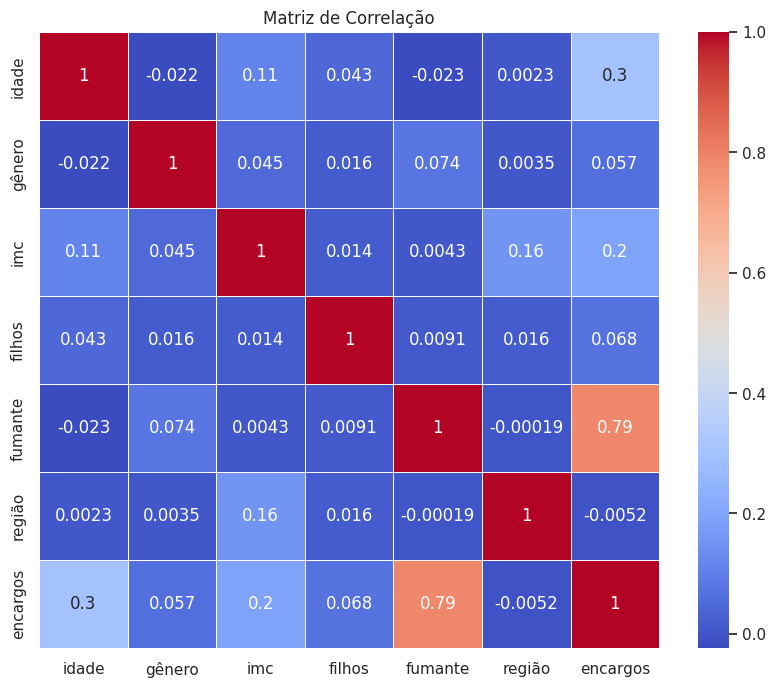

In [44]:
corr_matrix = df_num.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

Neste gráfico, observamos uma correlação positiva muito forte entre ser fumante e os encargos, indicando que fumantes tendem a ter encargos significativamente mais elevados.

A idade e o IMC apresentam uma correlação positiva moderada com os encargos, sugerindo que essas variáveis têm um impacto significativo nos encargos.

Por outro lado, o gênero e o número de filhos possuem correlações positivas muito baixas, mostrando que esses fatores têm pouco impacto no aumento dos encargos.

A região tem uma correlação praticamente inexistente com os encargos, sugerindo que a localização geográfica não afeta significativamente os encargos.

## 5. Pré-processamento dos dados

Para o pré-processamento dos dados, utilizaremos o LabelEncoder para as colunas que podem ser representadas de forma binária, como "gênero" e "fumante". Para a coluna "região", utilizaremos One-Hot Encoding com ColumnTransformer.

### 5.1 - Label Encoding

In [45]:
df_modelo = df.copy(deep=True)
df_modelo['gênero'] = label_encoder.fit_transform(df['gênero'])
df_modelo['fumante'] = label_encoder.fit_transform(df['fumante'])
df_modelo.head()


,idade,gênero,imc,filhos,fumante,região,encargos
0,56,0,29.774374,2,1,sudoeste,31109.889763
1,46,1,25.857395,1,0,nordeste,26650.702647
2,32,1,23.014840,0,0,sudoeste,21459.037990
3,19,0,27.900000,0,1,sudoeste,16884.924000
4,18,1,33.770000,1,0,sudeste,1725.552300


Agora temos a representação dos gêneros e fumante/não fumante da seguinte forma:


*   Feminino = 0
*   Masculino = 1


*   Não fumante = 0
*   Fumante = 1

### 5.2 - One-hot encoding e ColumnTransformer

In [46]:
column_transformer = ColumnTransformer(
    transformers=[
        ('região', OneHotEncoder(sparse=False), ['região'])
    ],
    remainder='passthrough'
)
df_transformado = column_transformer.fit_transform(df_modelo)

colunas_regiao = column_transformer.named_transformers_['região'].get_feature_names_out(['região'])
colunas_regiao = [col.split('_')[-1] for col in colunas_regiao]

df_transformado = pd.DataFrame(df_transformado, columns=colunas_regiao + list(df_modelo.columns.drop('região')))

colunas_reorganizadas = list(df.columns.drop('região')) + colunas_regiao
df_transformado =  df_transformado[colunas_reorganizadas]

df_transformado = df_transformado.drop_duplicates(keep='first')

df_transformado.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



,idade,gênero,imc,filhos,fumante,encargos,nordeste,noroeste,sudeste,sudoeste
0,56.0,0.0,29.774374,2.0,1.0,31109.889763,0.0,0.0,0.0,1.0
1,46.0,1.0,25.857395,1.0,0.0,26650.702647,1.0,0.0,0.0,0.0
2,32.0,1.0,23.014840,0.0,0.0,21459.037990,0.0,0.0,0.0,1.0
3,19.0,0.0,27.900000,0.0,1.0,16884.924000,0.0,0.0,0.0,1.0
4,18.0,1.0,33.770000,1.0,0.0,1725.552300,0.0,0.0,1.0,0.0


## 6. Normalização dos Dados

Para a normalização dos dados, antes de escolhermos entre MinMaxScaler e StandardScaler, vamos primeiro checar a normalidade de cada coluna e verificar se cada uma delas segue uma curva gaussiana usando o teste de Shapiro-Wilk.

In [47]:
def checar_normalidade(data, column, alpha=0.05):
    stat, p = shapiro(data[column])
    result = 'Normal' if p > alpha else 'Não Normal'
    return {
        'Coluna': column,
        'Estatística': round(stat, 4),
        'p-Valor': round(p, 4),
        'Resultado': result
    }

resultados = [checar_normalidade(df_transformado, column) for column in df_transformado.columns]

df_resultados = pd.DataFrame(resultados)
print("Resultados do teste de Shapiro-Wilk:")
print(df_resultados.to_string(index=False))

Resultados do teste de Shapiro-Wilk:
  Coluna  Estatística  p-Valor  Resultado
   idade       0.9450      0.0 Não Normal
  gênero       0.6366      0.0 Não Normal
     imc       0.9938      0.0 Não Normal
  filhos       0.8235      0.0 Não Normal
 fumante       0.4955      0.0 Não Normal
encargos       0.8162      0.0 Não Normal
nordeste       0.5320      0.0 Não Normal
noroeste       0.5314      0.0 Não Normal
 sudeste       0.5559      0.0 Não Normal
sudoeste       0.5334      0.0 Não Normal


Como podemos ver acima, nenhuma das nossas colunas segue uma curva gaussiana. Por isso, vamos normalizar nossos dados utilizando o MinMaxScaler.

## 7. Treinando e testando os modelos

Definindo alguns métodos auxiliares:

In [48]:
def calcular_mape(labels, predictions):
    errors = np.abs(labels - predictions)
    relative_errors = errors / np.abs(labels)
    mape = np.mean(relative_errors) * 100
    return mape

def calcular_metricas(y_teste, y_predito, nome, polynomial):
    mae = mean_absolute_error(y_teste, y_predito)
    mse = mean_squared_error(y_teste, y_predito)
    rmse = mse ** 0.5
    mape = calcular_mape(y_teste, y_predito)
    r2 = r2_score(y_teste, y_predito)

    return {'Modelo': nome,'Polynomial': polynomial, 'R2': r2,'MAPE': mape, 'MAE': mae, 'MSE': mse, 'RMSE': rmse}


def treinar_e_testar_modelo(x_treino, y_treino, x_teste, y_teste, polynomial):
    metricas = pd.DataFrame(columns=['Modelo','Polynomial','R2','MAPE', 'MAE', 'MSE', 'RMSE'])
    modelos = {
      'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=17),
      'Random Forest Regressor': RandomForestRegressor(random_state=17),
      'Decision Tree Regressor': DecisionTreeRegressor(random_state=17),
      'Linear Regression': LinearRegression(),
      'Ridge Regression': Ridge(random_state=17),
      'Lasso Regression': Lasso(random_state=17),
      'KNN Regressor': KNeighborsRegressor(),
      'Elastic Net Regression': ElasticNet(random_state=17),
      'Support Vector Regressor': SVR()
    }
    for name, modelo in modelos.items():
        modelo.fit(x_treino, y_treino)
        y_predito = modelo.predict(x_teste)
        metricas_dict = calcular_metricas(y_teste, y_predito, name, polynomial)
        metricas = pd.concat([metricas, pd.DataFrame([metricas_dict])], ignore_index=True)

    return metricas

def escalar_dados(X_treino, X_teste):
    scaler = MinMaxScaler()
    scaler.fit(X_treino)
    x_treino_escalado = scaler.transform(X_treino)
    x_teste_escalado = scaler.transform(X_teste)
    return x_treino_escalado, x_teste_escalado

def aplicar_polynomial(x_treino, x_teste, degree=2):
    poly = PolynomialFeatures(degree=degree)
    x_treino_poly = poly.fit_transform(x_treino)
    x_teste_poly = poly.transform(x_teste)
    return x_treino_poly, x_teste_poly

def remove_outliers_zscore(df, column):
    z_scores = stats.zscore(df[column])
    abs_z_scores = np.abs(z_scores)
    zscore_outliers = (abs_z_scores > 3)
    df_limpo = df[~zscore_outliers]
    return df_limpo

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    menor = Q1 - 1.5 * IQR
    maior = Q3 + 1.5 * IQR
    iqr_outliers = (df[column] < menor) | (df[column] > maior)
    df_limpo = df[~iqr_outliers]
    return df_limpo

def buscar_param_grid(model_name):
    param_grids = {
        'Gradient Boosting Regressor': {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        },
        'Random Forest Regressor': {
            'n_estimators': [100, 200, 300, 500],
            'max_depth': [None, 10, 20, 30, 40, 50],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 5, 10],
            'max_features': ['sqrt', 'log2']
        },
        'Decision Tree Regressor': {
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 'log2']
        },
        'Ridge Regression': {
            'alpha': [0.1, 1, 10, 100],
            'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg']
        },
        'Lasso Regression': {
            'alpha': [0.1, 1, 10, 100],
            'selection': ['cyclic', 'random']
        },
        'KNN Regressor': {
            'n_neighbors': [3, 5, 7, 10],
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
        },
        'Elastic Net Regression': {
            'alpha': [0.1, 1, 10, 100],
            'l1_ratio': [0.1, 0.5, 0.9],
            'selection': ['cyclic', 'random']
        },
        'Support Vector Regressor': {
            'C': [0.1, 1, 10, 100],
            'epsilon': [0.1, 0.2, 0.3],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'gamma': ['scale', 'auto']
        }
    }

    return param_grids.get(model_name, "Modelo não encontrado")

def treinar_e_testar_modelo_grid_search(x_treino, y_treino, x_teste, y_teste, polynomial):
    metricas = pd.DataFrame(columns=['Modelo', 'Polynomial', 'R2', 'MAPE', 'MAE', 'MSE', 'RMSE'])
    modelos = {
        'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=17),
        'Random Forest Regressor': RandomForestRegressor(random_state=17),
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(random_state=17),
        'Lasso Regression': Lasso(random_state=17)
        # 'Decision Tree Regressor': DecisionTreeRegressor(random_state=17),
        # 'KNN Regressor': KNeighborsRegressor(),
        # 'Elastic Net Regression': ElasticNet(random_state=17),
        # 'Support Vector Regressor': SVR()
    }

    for name, modelo in modelos.items():
        param_grid = buscar_param_grid(name)
        if param_grid != "Modelo não encontrado":
            grid_search = GridSearchCV(estimator=modelo, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
            grid_search.fit(x_treino, y_treino)
            print(f"Melhores parâmetros encontrados: {name}")
            print(grid_search.best_params_)
            best_model = grid_search.best_estimator_
        else:
            best_model = modelo
            best_model.fit(x_treino, y_treino)

        y_predito = best_model.predict(x_teste)
        metricas_dict = calcular_metricas(y_teste, y_predito, name, polynomial)
        metricas = pd.concat([metricas, pd.DataFrame([metricas_dict])], ignore_index=True)

    return metricas

def processar_metricas(metricas, metricas_poly):

    ranking_metricas = pd.concat([metricas, metricas_poly], ignore_index=True)
    ranking_metricas = ranking_metricas.sort_values(by=['R2', 'MAPE', 'Modelo'], ascending=[False, True, False])

    ranking_metricas['R2'] = ranking_metricas['R2'] * 100
    ranking_metricas['R2'] = ranking_metricas['R2'].map('{:.2f}%'.format)
    ranking_metricas['MAPE'] = ranking_metricas['MAPE'].map('{:.2f}%'.format)
    styled_ranking_metricas = ranking_metricas.style.hide(axis="index")

    #print(ranking_metricas.to_string(index=False))
    return styled_ranking_metricas

### 7.1 - Treinando o modelo com Outliers

Decidimos treinar o modelo de duas formas. Uma com a aplicação de Polynomial Features e outra sem a aplicação.

In [49]:
X = df_transformado.drop(columns=['encargos'])
y = df_transformado['encargos']
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, stratify=X['fumante'], random_state=17)
x_treino_escalado, x_teste_escalado = escalar_dados(X_treino, X_teste)

#COM POLYNOMIAL
x_treino_poly, x_teste_poly = aplicar_polynomial(x_treino_escalado, x_teste_escalado)
metricas_poly = treinar_e_testar_modelo(x_treino_poly, y_treino, x_teste_poly, y_teste, 'COM')

#SEM POLYNOMIAL
metricas = treinar_e_testar_modelo(x_treino_escalado, y_treino, x_teste_escalado, y_teste, 'SEM')

processar_metricas(metricas, metricas_poly)

<ipython-input-48-875d50597225>:34: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.511e+09, tolerance: 1.572e+07

<ipython-input-48-875d50597225>:34: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Modelo,Polynomial,R2,MAPE,MAE,MSE,RMSE
Gradient Boosting Regressor,SEM,88.80%,24.74%,2287.129872,16384861.689116,4047.821845
Gradient Boosting Regressor,COM,87.89%,26.80%,2395.018549,17722224.452891,4209.777245
Ridge Regression,COM,86.65%,27.92%,2840.034073,19533854.393224,4419.712026
Random Forest Regressor,SEM,86.64%,31.92%,2658.166533,19550639.159879,4421.610471
Lasso Regression,COM,86.17%,27.93%,2885.760200,20229475.901598,4497.718966
Linear Regression,COM,86.06%,28.14%,2906.638544,20397273.575748,4516.334086
Random Forest Regressor,COM,85.99%,30.96%,2638.726156,20501970.727803,4527.910194
Linear Regression,SEM,78.29%,39.58%,4068.324488,31756775.276842,5635.315011
Lasso Regression,SEM,78.29%,39.55%,4067.427907,31767403.125897,5636.257901
Ridge Regression,SEM,78.22%,39.29%,4065.349948,31865495.063289,5644.953061


### 7.2 - Treinando o modelo sem Outliers IMC

Dessa vez repetimos o procedimento, retirando os outliers de IMC.

In [50]:
df_limpo = remove_outliers_zscore(df_transformado, 'imc')
df_limpo = remove_outliers_iqr(df_limpo, 'imc')

X_limpo = df_limpo.drop(columns=['encargos'])
y_limpo = df_limpo['encargos']
X_treino_limpo, X_teste_limpo, y_treino_limpo, y_teste_limpo = train_test_split(X_limpo, y_limpo, test_size=0.2, stratify=X_limpo['fumante'], random_state=17)
x_treino_escalado_limpo, x_teste_escalado_limpo = escalar_dados(X_treino_limpo, X_teste_limpo)

#COM POLYNOMIAL - SEM OUTLIERS#
x_treino_poly_limpo, x_teste_poly_limpo = aplicar_polynomial(x_treino_escalado_limpo, x_teste_escalado_limpo)
metricas_sem_outliers_poly = treinar_e_testar_modelo(x_treino_poly_limpo, y_treino_limpo, x_teste_poly_limpo, y_teste_limpo, 'COM')

#SEM POLYNOMIAL - SEM OUTLIERS#
metricas_sem_outliers = treinar_e_testar_modelo(x_treino_escalado_limpo, y_treino_limpo, x_teste_escalado_limpo, y_teste_limpo, 'SEM')

processar_metricas(metricas_sem_outliers, metricas_sem_outliers_poly)

<ipython-input-48-875d50597225>:34: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.923e+09, tolerance: 1.559e+07

<ipython-input-48-875d50597225>:34: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Modelo,Polynomial,R2,MAPE,MAE,MSE,RMSE
Gradient Boosting Regressor,SEM,89.24%,31.26%,2272.448388,14296260.578963,3781.039616
Gradient Boosting Regressor,COM,88.84%,32.77%,2394.810551,14834024.195052,3851.496358
Random Forest Regressor,SEM,87.91%,33.98%,2483.383396,16070450.864995,4008.796685
Random Forest Regressor,COM,87.70%,33.18%,2521.873128,16348102.282073,4043.278655
Lasso Regression,COM,87.43%,31.24%,2691.519529,16709910.154927,4087.775698
Linear Regression,COM,87.40%,30.82%,2682.534846,16746240.396149,4092.217051
Ridge Regression,COM,87.35%,30.83%,2706.318632,16810389.892187,4100.047548
KNN Regressor,SEM,79.87%,36.13%,3264.487387,26751313.840195,5172.167229
KNN Regressor,COM,79.81%,37.07%,3316.558050,26834904.679157,5180.241759
Ridge Regression,SEM,78.25%,43.57%,3917.784823,28907630.950740,5376.581716


## 8. Utilizando Grid Search para encontrar os melhores hiper parâmetros

### 8.1 - Com Outliers - descomente a célula de código (Tempo de execução de pouco mais de 1 hora)

**Com Polynomial**
- Melhores parâmetros encontrados: Gradient Boosting Regressor

{'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}

- Melhores parâmetros encontrados: Random Forest Regressor

{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}

- Melhores parâmetros encontrados: Ridge Regression

{'alpha': 0.1, 'solver': 'svd'}

- Melhores parâmetros encontrados: Lasso Regression

{'alpha': 10, 'selection': 'random'}


**Sem Polynomial**
- Melhores parâmetros encontrados: Gradient Boosting Regressor

{'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}

- Melhores parâmetros encontrados: Random Forest Regressor

{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

- Melhores parâmetros encontrados: Ridge Regression

{'alpha': 0.1, 'solver': 'auto'}

- Melhores parâmetros encontrados: Lasso Regression

{'alpha': 10, 'selection': 'random'}


| Modelo                     | Polynomial | R2     | MAPE   | MAE        | MSE             | RMSE       |
|----------------------------|------------|--------|--------|------------|-----------------|------------|
| Gradient Boosting Regressor| SEM        | 88.59% | 31.99% | 2474.290113| 16693510.273428 | 4085.769239|
| Gradient Boosting Regressor| COM        | 88.50% | 33.48% | 2484.065943| 16822743.309369 | 4101.553768|
| Random Forest Regressor    | COM        | 88.44% | 29.44% | 2457.639582| 16910986.312777 | 4112.296963|
| Random Forest Regressor    | SEM        | 87.71% | 33.56% | 2743.916592| 17976665.113434 | 4239.889753|
| Lasso Regression           | COM        | 86.27% | 29.07% | 2869.185171| 20082598.908203 | 4481.401445|
| Ridge Regression           | COM        | 86.23% | 27.95% | 2884.994797| 20148890.018341 | 4488.761524|
| Linear Regression          | COM        | 86.06% | 28.14% | 2906.638544| 20397273.542807 | 4516.334086|
| Linear Regression          | SEM        | 78.29% | 39.58% | 4068.324488| 31756775.276542 | 5635.315011|
| Ridge Regression           | SEM        | 78.29% | 39.55% | 4067.957486| 31767069.020980 | 5636.228262|
| Lasso Regression           | SEM        | 78.22% | 39.28% | 4059.402210| 31886346.267663 | 5645.205600|


In [ ]:
# X = df_transformado.drop(columns=['encargos'])
# y = df_transformado['encargos']
# X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, stratify=X['fumante'], random_state=17)
# x_treino_escalado, x_teste_escalado = escalar_dados(X_treino, X_teste)


# #COM POLYNOMIAL
# x_treino_poly, x_teste_poly = aplicar_polynomial(x_treino_escalado, x_teste_escalado)
# metricas_poly = treinar_e_testar_modelo_grid_search(x_treino_poly, y_treino, x_teste_poly, y_teste, 'COM')

# #SEM POLYNOMIAL
# metricas = treinar_e_testar_modelo_grid_search(x_treino_escalado, y_treino, x_teste_escalado, y_teste, 'SEM')

# processar_metricas(metricas, metricas_poly)

### 8.2 - Sem Outliers IMC - descomente a célula de código (Tempo de execução de pouco mais de 1 hora)

**Com Polynomial**

- Melhores parâmetros encontrados: Gradient Boosting Regressor

{'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}

- Melhores parâmetros encontrados: Random Forest Regressor

{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 500}

- Melhores parâmetros encontrados: Ridge Regression

{'alpha': 0.1, 'solver': 'sparse_cg'}

- Melhores parâmetros encontrados: Lasso Regression

{'alpha': 10, 'selection': 'random'}


**Sem Polynomial**

- Melhores parâmetros encontrados: Gradient Boosting Regressor

{'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}

- Melhores parâmetros encontrados: Random Forest Regressor

{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

- Melhores parâmetros encontrados: Ridge Regression

{'alpha': 1, 'solver': 'auto'}

- Melhores parâmetros encontrados: Lasso Regression

{'alpha': 10, 'selection': 'random'}

| Modelo                     | Polynomial | R2     | MAPE   | MAE        | MSE             | RMSE       |
|----------------------------|------------|--------|--------|------------|-----------------|------------|
| Gradient Boosting Regressor| SEM        | 90.01% | 37.49% | 2312.480881| 13269960.270520 | 3642.795667|
| Random Forest Regressor    | COM        | 89.75% | 35.56% | 2394.949529| 13615440.747944 | 3689.910669|
| Gradient Boosting Regressor| COM        | 89.53% | 40.40% | 2392.172457| 13910551.497098 | 3729.685174|
| Random Forest Regressor    | SEM        | 88.98% | 39.76% | 2568.510703| 14640083.660655 | 3826.236226|
| Lasso Regression           | COM        | 87.58% | 32.23% | 2680.552183| 16506987.420599 | 4062.879203|
| Linear Regression          | COM        | 87.40% | 30.82% | 2682.534846| 16746420.396149 | 4092.217051|
| Ridge Regression           | COM        | 87.40% | 30.86% | 2688.554807| 16746373.258968 | 4092.233285|
| Ridge Regression           | SEM        | 78.25% | 43.57% | 3917.784823| 28907630.950740 | 5376.581716|
| Lasso Regression           | SEM        | 78.22% | 43.46% | 3911.998492| 28942160.513402 | 5379.791865|
| Linear Regression          | SEM        | 77.95% | 43.60% | 3952.574152| 29305784.533068 | 5413.481738|


In [ ]:
# df_limpo = remove_outliers_zscore(df_transformado, 'imc')
# df_limpo = remove_outliers_iqr(df_limpo, 'imc')

# X_limpo = df_limpo.drop(columns=['encargos'])
# y_limpo = df_limpo['encargos']
# X_treino_limpo, X_teste_limpo, y_treino_limpo, y_teste_limpo = train_test_split(X_limpo, y_limpo, test_size=0.2, stratify=X_limpo['fumante'], random_state=17)
# x_treino_escalado_limpo, x_teste_escalado_limpo = escalar_dados(X_treino_limpo, X_teste_limpo)

# #COM POLYNOMIAL - SEM OUTLIERS#
# x_treino_poly_limpo, x_teste_poly_limpo = aplicar_polynomial(x_treino_escalado_limpo, x_teste_escalado_limpo)
# metricas_sem_outliers_poly = treinar_e_testar_modelo_grid_search(x_treino_poly_limpo, y_treino_limpo, x_teste_poly_limpo, y_teste_limpo, 'COM')

# #SEM POLYNOMIAL - SEM OUTLIERS#
# metricas_sem_outliers = treinar_e_testar_modelo_grid_search(x_treino_escalado_limpo, y_treino_limpo, x_teste_escalado_limpo, y_teste_limpo, 'SEM')

# processar_metricas(metricas_sem_outliers, metricas_sem_outliers_poly)

## 9. Análise dos Resultados - MAPE Limite de 30%




**Sem Parâmetros e Com Outliers**

Gradient Boosting Regressor (sem polynomial features) apresentou MAPE de 24,74%, o único modelo abaixo do limite de 30%. Com R² de 88,80% e MAE de 2287,13, teve o melhor desempenho geral.
Outros modelos tiveram MAPE acima de 30%, indicando erros percentuais elevados.

**Sem Parâmetros e Sem Outliers**

Gradient Boosting Regressor (sem polynomial features) novamente se destacou com MAPE de 31,26%, ligeiramente acima do limite de 30%. Com R² de 89,24% e MAE de 2272,45, teve o melhor desempenho.
Nenhum outro modelo ficou abaixo do limite de 30% de MAPE.

**Com Parâmetros e Com Outliers**

O único modelo que conseguiu ficar abaixo do limite definido foi o Random Forest Regressor com MAPE de 29,44%, R² de 88,44% e MAE de 2457,64.

**Com Parâmetros e Sem Outliers**

Nenhum modelo conseguiu ficar abaixo do limite de 30% de MAPE. O Gradient Boosting Regressor apresentou MAPE de 37,49%, R² de 90,01% e MAE de 2312,48.
O Random Forest Regressor teve MAPE de 35,56%, R² de 89,75% e MAE de 2394,95.

Ao observar os resultados, percebemos que há um aumento no MAPE quando há uma melhora no R² score na maioria dos cenários. Para manter o nível de erro baixo, realizaremos nossa análise considerando um limite máximo de 30% para o MAPE.

## 10. Conclusão

Com base no limite de 30% para MAPE, apenas um modelo conseguiu atender a este critério:

O **Gradient Boosting Regressor** (sem polynomial features, sem parâmetros e com outliers) é o único modelo que ficou consistentemente abaixo do limite de 30% de MAPE, com um valor de 24,74%. Este modelo também apresentou um alto R² de 88,80% e um MAE de 2287,13.